In [4]:
import statistics
import seaborn as sns

1. Загрузите файл HR.csv в pandas dataframe

In [5]:
import pandas as pd

df = pd.read_csv('HR.csv')

satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [7]:
only_number_columns = df.select_dtypes(include = 'number')

rows = []
for series_name, series in only_number_columns.items():

    rows.append({'mean': only_number_columns.loc[:, series_name].mean(),\
                 'median': only_number_columns.loc[:, series_name].median(),\
                 'mode': only_number_columns.loc[:, series_name].mode(),\
                 'min': only_number_columns.loc[:, series_name].min(),\
                 'max': only_number_columns.loc[:, series_name].max(),\
                 'std': only_number_columns.loc[:, series_name].std()})

In [8]:
pd.DataFrame(rows)

,mean,median,mode,min,max,std
0,0.612834,0.64,"0 0.1 Name: satisfaction_level, dtype: float64",0.09,1.0,0.248631
1,0.716102,0.72,"0 0.55 Name: last_evaluation, dtype: float64",0.36,1.0,0.171169
2,3.803054,4.00,"0 4 Name: number_project, dtype: int64",2.00,7.0,1.232592
3,201.050337,200.00,"0 135 1 156 Name: average_montly_hours, ...",96.00,310.0,49.943099
4,3.498233,3.00,"0 3 Name: time_spend_company, dtype: int64",2.00,10.0,1.460136
5,0.144610,0.00,"0 0 Name: Work_accident, dtype: int64",0.00,1.0,0.351719
6,0.238083,0.00,"0 0 Name: left, dtype: int64",0.00,1.0,0.425924
7,0.021268,0.00,"0 0 Name: promotion_last_5years, dtype: int64",0.00,1.0,0.144281


3. Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [9]:
corr_common = df.corr(method = 'pearson', min_periods = 1, numeric_only = True)
corr_common

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<ipython-input-10-22ced0819518>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


<Axes: >

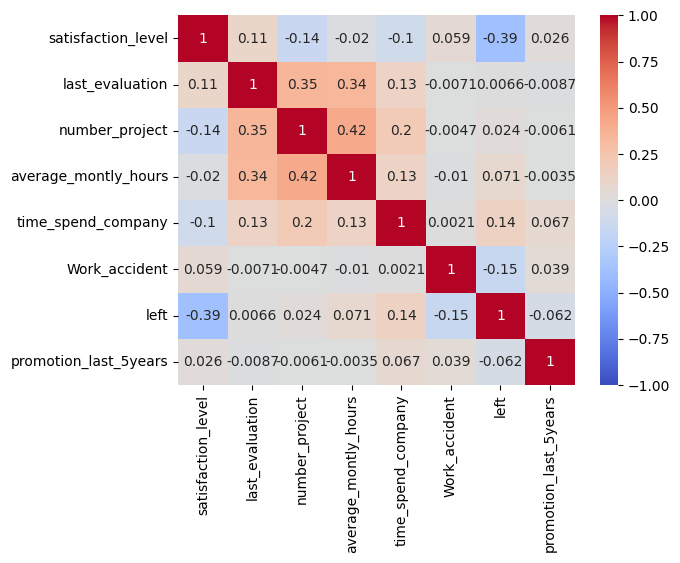

In [10]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [11]:
corr_pair = {}
for series_name, series in corr_common.items():
    for key, value in series.to_dict().items():
        if series_name != key:#исключить сравнения переменной с собой
            if value not in corr_pair.values():#исключить дублирование значений в итоговом словаре
                corr_pair[series_name + ' - ' + key] = value#запись пар наименований переменных и соответственно значений

In [12]:
intro = sorted(corr_pair.items(), key=lambda kv: kv[1])

In [13]:
print(intro[-1])
print(intro[-2])
print(intro[1])
print(intro[0])

('number_project - average_montly_hours', 0.41721063440177986)
('last_evaluation - number_project', 0.34933258851626237)
('Work_accident - left', -0.15462163370513443)
('satisfaction_level - left', -0.3883749834241161)


4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [14]:
df.groupby(['department']).agg({'department': ['count']}).reset_index()

department      
               count
0           IT  1227
1        RandD   787
2   accounting   767
3           hr   739
4   management   630
5    marketing   858
6  product_mng   902
7        sales  4140
8      support  2229
9    technical  2720

5. Показать распределение сотрудников по зарплатам.

In [15]:
df.groupby(['salary']).agg({'salary': ['count']}).reset_index()

salary      
          count
0    high  1237
1     low  7316
2  medium  6446

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [16]:
observ = df.groupby(['department']).agg({'department': ['count']})

In [17]:
list(observ['department'].index)

['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [18]:
for record in list(observ['department'].index):
    print(record)
    print(df[df['department'] == record].groupby(['salary']).agg({'salary': ['count']}).reset_index())
    print()

IT
   salary      
          count
0    high    83
1     low   609
2  medium   535

RandD
   salary      
          count
0    high    51
1     low   364
2  medium   372

accounting
   salary      
          count
0    high    74
1     low   358
2  medium   335

hr
   salary      
          count
0    high    45
1     low   335
2  medium   359

management
   salary      
          count
0    high   225
1     low   180
2  medium   225

marketing
   salary      
          count
0    high    80
1     low   402
2  medium   376

product_mng
   salary      
          count
0    high    68
1     low   451
2  medium   383

sales
   salary      
          count
0    high   269
1     low  2099
2  medium  1772

support
   salary      
          count
0    high   141
1     low  1146
2  medium   942

technical
   salary      
          count
0    high   201
1     low  1372
2  medium  1147



7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [19]:
import scipy.stats as st

In [20]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [21]:
high_lewel = df[df['salary'] == 'high']['average_montly_hours']

In [22]:
low_lewel = df[df['salary'] == 'low']['average_montly_hours']

In [23]:
def check_normality(data, alpha = 0.05):
    stat, p = st.normaltest(data) # Критерий согласия Пирсона
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p <= alpha:# условие статистической значимости
        f = 0
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        f = 1
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
    return f

In [24]:
check_normality(high_lewel)

Statistics=339.678, p-value=0.000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


0

In [25]:
check_normality(low_lewel)

Statistics=4477.067, p-value=0.000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


0

In [26]:
stat, p = st.mannwhitneyu(high_lewel, low_lewel)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
alpha = 0.05
if p > alpha:
    print('гипотезa, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом не подтверждается')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
гипотезa, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом не подтверждается


In [27]:
high_lewel.describe()

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

In [28]:
low_lewel.describe()

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [29]:
pd.DataFrame({'показатель среди': [' уволившихся', 'не уволившихся'],
    'с повышением': [\
        round(df[df['left'] == 1]['promotion_last_5years'].count()/df['promotion_last_5years'].count(), 2),
        round(df[df['left'] != 1]['promotion_last_5years'].count()/df['promotion_last_5years'].count(), 2)],

    'удовлетворенность': [\
        round(df[df['left'] == 1]['satisfaction_level'].mean(), 2),
        round(df[df['left'] != 1]['satisfaction_level'].mean(), 2)],
    'Среднее количество проектов' : [\
        round(df[df['left'] == 1]['number_project'].mean(), 0),
        round(df[df['left'] != 1]['number_project'].mean(), 0)]
})

,показатель среди,с повышением,удовлетворенность,Среднее количество проектов
0,уволившихся,0.24,0.44,4.0
1,не уволившихся,0.76,0.67,4.0


9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['left', 'department', 'salary'], axis=1), df['left'], test_size=0.2, random_state=5)

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [33]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
result = pd.DataFrame([y_test, lda.predict(X_test)])

In [38]:
accuracy_score(y_test, lda.predict(X_test))

0.7493333333333333

Точность модели на тестовой выборке составляет 74.93 %

10. Загрузить jupyter notebook с решение на github и прислать ссылку

https://github.com/ej314169255/solution/blob/44a915321c6bcd7a55c9adeedec54cbc4a5423a6/link_to_solution_fin_work